### Machine Learning I - Fase 1

Nome: **Marcel Luís dos Santos Albuquerque**

### Análise Exploratória e Preparação dos Dados


Nesta fase, você se apropriará dos dados, conhecendo o dataset. Será nesta fase que você fará a etapa de Exploratory Data Analysis, EDA, que consiste em uma análise exploratória dos dados. A partir das técnicas de EDA você descobrirá as características dos dados quanto ao tipo, atributos, escala, frequência, distribuição, dados faltantes etc.

Faz parte dessa etapa também a preparação dos dados, isso inclui a limpeza dos dados, correção, reescala e transformação, bem como a seleção dos atributos mais relevantes para a tarefa de classificação a ser explorada na fase 2.


#### Principais insights

- O dataset contém 31 colunas e 18.422 registros (linhas);
- A maioria das colunas são do tipo object (texto), com 5 colunas float64 (numéricas);
- O dataset tem muitas colunas com valores ausentes: relative_humidity(~90%), temperature, temperature_num, temperature_range (~68%), veg_landuse_type_buffer5km_level2 (~76%), invertebrate_collector_structure (~49%), plant_flower_shape, invertebrate_origins, plant_flower_colour (23–32%) e number_of_this_plant/invertebrate_interactions_onsite (~50%);
- Assimetria e outliers nas variáveis numéricas.

#### 1) Formatação dos atributos


Antes de analisar os atributos, precisamos unificar o formato de representação de cada coluna.

Verifique quais colunas estão com mais de uma representação de seu valor e formate para que todos os valores fiquem na mesma representação.

Ex: A coluna “temperature” precisa ser formatada para que todos os valores representem a temperatura em um formato único.

Por fim, você deve transformar todas as colunas para o formato numérico.

**OBS:** Lembre-se que colunas nominais e ordinais possuem formas diferentes de serem transformadas em numéricas.


In [ ]:
# Insira seu código aqui.
# Você pode criar células de código adicionais


# TODO
# 1) Visualização dos dados de cada coluna
# 2) Identificação das colunas que precisa ter seus dados unificados
# 3) Formatação de cada coluna coletada
# 4) Transformação das colunas no formato numérico

##### Importando as bibliotecas essenciais e carregando o base de dados

In [81]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando dataset
df = pd.read_csv('../data/raw/AtlanticForestInvertFloInteractionData_2022-07.csv')

##### Visão geral da base de dados

In [84]:
# Primeiras linhas
df.head(5)

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
0,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,2.0,2.0,5.0,NaN,whole body
1,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Melipona,Melipona quadrifasciata,native,floral visitor,NaN,1.0,1.0,2.0,NaN,whole body
2,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Augochlora,Augochlora sp.,native,floral visitor,NaN,5.0,5.0,1.0,NaN,whole body
3,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,NaN,Syrphidae sp,native,floral visitor,NaN,7.0,7.0,1.0,NaN,whole body
4,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,1.0,1.0,6.0,NaN,whole body


In [85]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   municipality                                     18422 non-null  object 
 1   state                                            18422 non-null  object 
 2   country                                          18422 non-null  object 
 3   veg_landuse_type_point_level1                    17769 non-null  object 
 4   veg_landuse_type_point_level2                    9278 non-null   object 
 5   veg_landuse_type_buffer5km_level1                15396 non-null  object 
 6   veg_landuse_type_buffer5km_level2                4326 non-null   object 
 7   temperature                                      5829 non-null   object 
 8   temperature_num                                  5829 non-null   float64
 9   temperature_range           

In [86]:
# Estatísticas descritivas
df.describe(include='all')

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
count,18422,18422,18422,17769,9278,15396,4326,5829,5829.000000,5829.000000,...,15889,18384,13134,15356,9394,17186.000000,9326.000000,9187.000000,14684,16101
unique,187,19,3,28,43,58,20,300,NaN,NaN,...,626,2542,2,36,25,NaN,NaN,NaN,25,7
top,Antonina,Sao Paulo,Brazil,forest,early,forest,sugarcane,20.00-30.00,NaN,NaN,...,Apis,Apis mellifera,native,touched reproductive structures,corbicula,NaN,NaN,NaN,flowers and branches,whole body
freq,2252,6512,17985,8087,1813,7135,1598,2780,NaN,NaN,...,2091,2082,11094,5245,3056,NaN,NaN,NaN,9927,15216
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.364061,7.184217,...,NaN,NaN,NaN,NaN,NaN,10.002677,147.683144,46.998476,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.583772,4.914814,...,NaN,NaN,NaN,NaN,NaN,61.570269,439.225349,147.048603,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,17.000000,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,50.000000,16.000000,NaN,NaN


##### Verificando valores nulos

In [88]:
# Contagem de valores ausentes por coluna
df.isnull().sum().sort_values(ascending=False)

relative_humidity                                  16593
veg_landuse_type_buffer5km_level2                  14096
temperature                                        12593
temperature_range                                  12593
temperature_num                                    12593
number_of_this_invertebrate_interactions_onsite     9235
veg_landuse_type_point_level2                       9144
number_of_this_plant_interactions_onsite            9096
invertebrate_collector_structure                    9028
plant_flower_shape                                  5998
invertebrate_origins                                5288
plant_flower_colour                                 4374
plant_habit                                         3870
plant_collected_material                            3738
plant_type                                          3588
invertebrate_behavior                               3066
veg_landuse_type_buffer5km_level1                   3026
invertebrate_genera            

In [89]:
# Porcentagem de valores ausentes
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

relative_humidity                                  90.071653
veg_landuse_type_buffer5km_level2                  76.517208
temperature                                        68.358484
temperature_range                                  68.358484
temperature_num                                    68.358484
number_of_this_invertebrate_interactions_onsite    50.130279
veg_landuse_type_point_level2                      49.636304
number_of_this_plant_interactions_onsite           49.375746
invertebrate_collector_structure                   49.006623
plant_flower_shape                                 32.558897
invertebrate_origins                               28.704809
plant_flower_colour                                23.743350
plant_habit                                        21.007491
plant_collected_material                           20.290956
plant_type                                         19.476713
invertebrate_behavior                              16.643144
veg_landuse_type_buffer5

In [ ]:
# Verificando valores únicos em algumas colunas com possíveis intervalos
for col in ['temperature', 'relative_humidity']:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(dropna=False).head(10))


Coluna: temperature
temperature
NaN            12593
20.00-30.00     2780
15.00-27.00     1084
22               265
22.00-24.00      132
25               123
21               100
23                82
26                82
24                48
Name: count, dtype: int64

Coluna: relative_humidity
relative_humidity
NaN      16593
50-80     1084
91          95
80          57
60          43
82          28
76          24
70          20
74          17
83          15
Name: count, dtype: int64


#### 1.1) Visualização dos dados de cada coluna

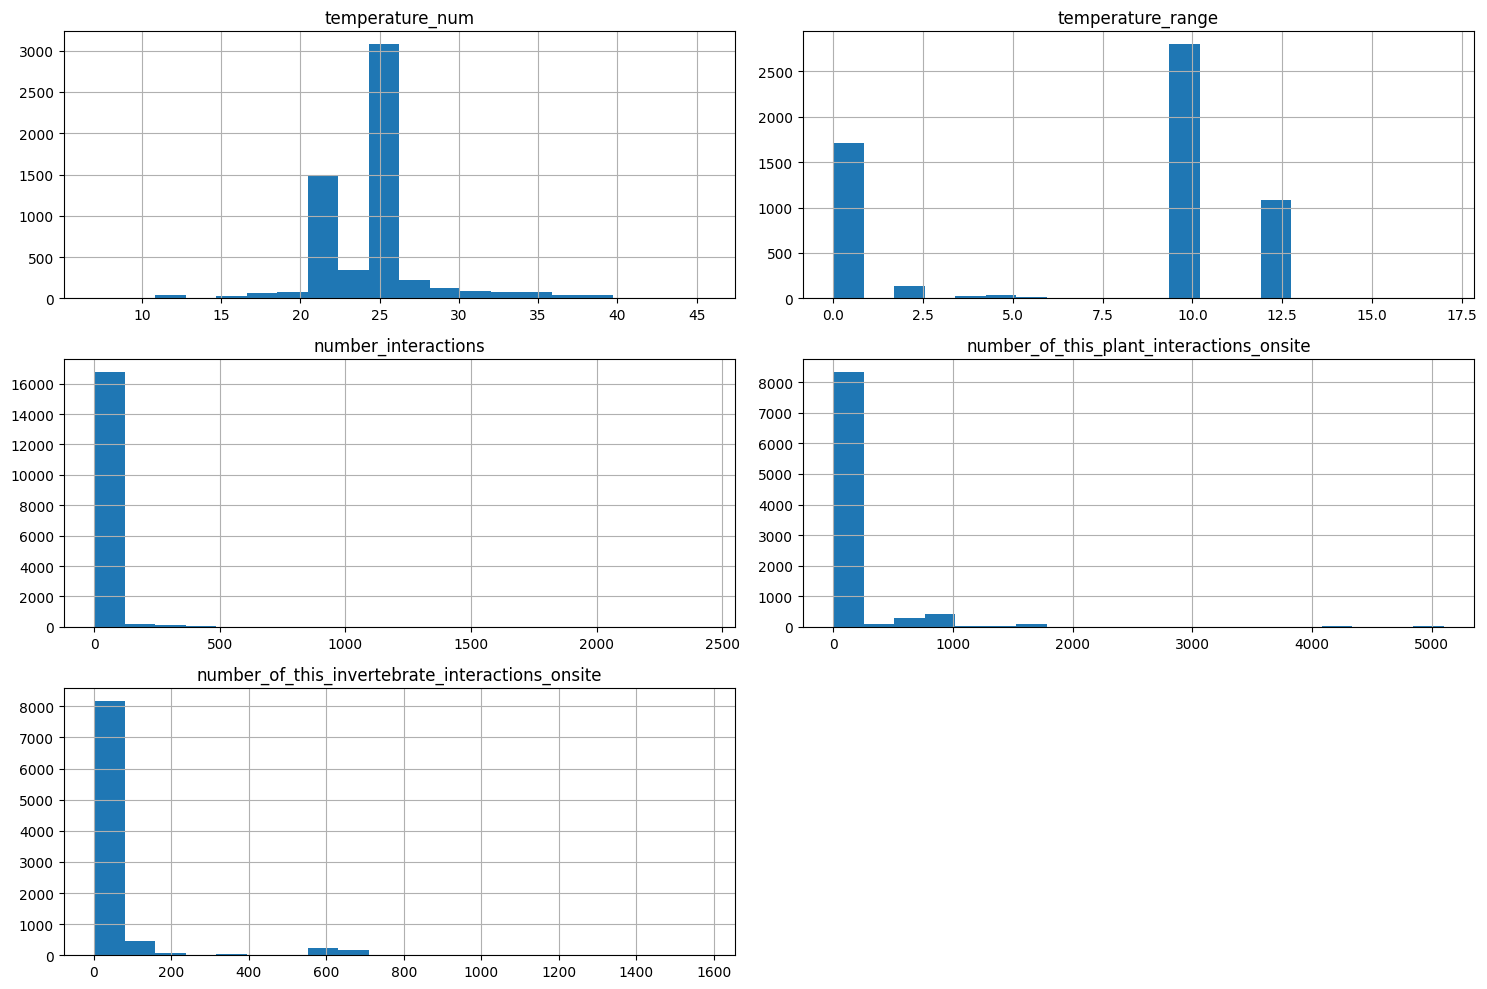

In [92]:
# Histograma para colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

df[colunas_numericas].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

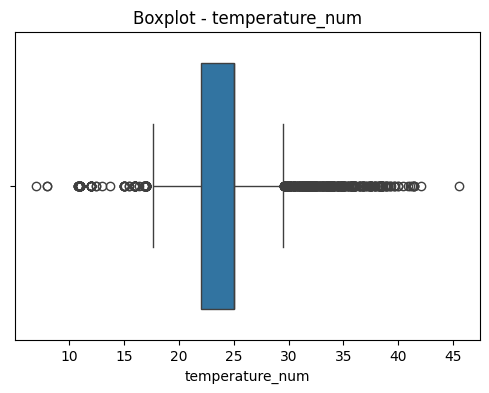

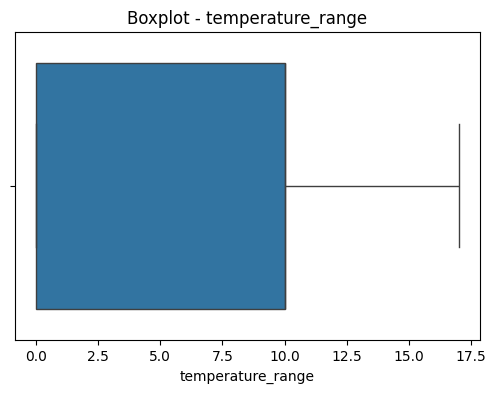

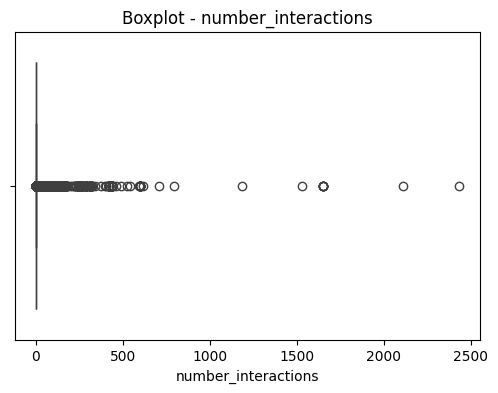

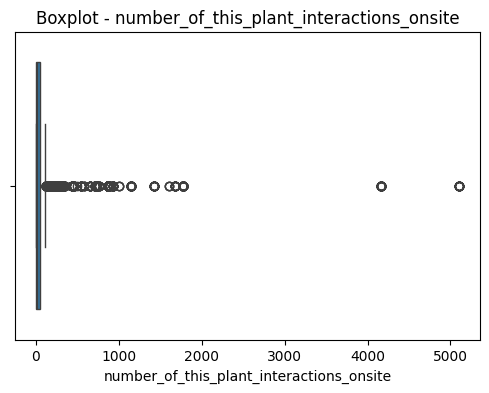

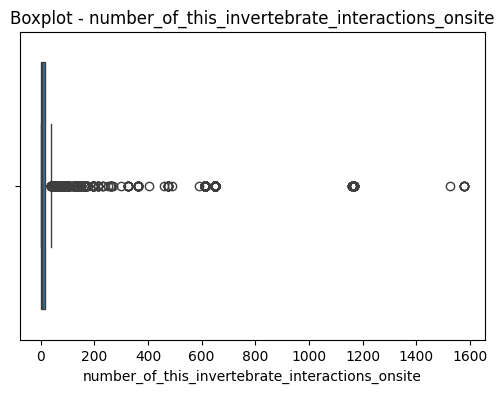

In [93]:
# Boxplots para detectar outliers
for col in colunas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
    plt.show()

In [95]:
# Contagem de categorias para colunas categóricas
colunas_categoricas = df.select_dtypes(include='object').columns

for col in colunas_categoricas:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False).head(10))


municipality:
 municipality
Antonina         2252
Joao Pessoa      1199
Araras            966
Florianopolis     805
Mucuge            791
Ibicoara          671
Viamao            573
Atibaia           520
Porto Alegre      414
Ancud             372
Name: count, dtype: int64

state:
 state
Sao Paulo            6512
Bahia                3565
Parana               2278
Santa Catarina       1388
Paraiba              1272
Rio Grande do Sul    1228
Minas Gerais          803
Los Lagos             372
Ceara                 320
Espirito Santo        267
Name: count, dtype: int64

country:
 country
Brazil       17985
Chile          372
Argentina       65
Name: count, dtype: int64

veg_landuse_type_point_level1:
 veg_landuse_type_point_level1
forest         8087
pasture        2756
agriculture    1270
savanna        1226
orchard         928
grassland       917
NaN             653
urban           509
fields          477
restinga        468
Name: count, dtype: int64

veg_landuse_type_point_level2:
 

#### 1.2) Identificação de colunas que precisam de padronização

In [108]:
for col in df.columns:
    print(f"\nColuna: {col}")
    print(df[col].astype(str).value_counts(dropna=False).head(10))


Coluna: municipality
municipality
Antonina         2252
Joao Pessoa      1199
Araras            966
Florianopolis     805
Mucuge            791
Ibicoara          671
Viamao            573
Atibaia           520
Porto Alegre      414
Ancud             372
Name: count, dtype: int64

Coluna: state
state
Sao Paulo            6512
Bahia                3565
Parana               2278
Santa Catarina       1388
Paraiba              1272
Rio Grande do Sul    1228
Minas Gerais          803
Los Lagos             372
Ceara                 320
Espirito Santo        267
Name: count, dtype: int64

Coluna: country
country
Brazil       17985
Chile          372
Argentina       65
Name: count, dtype: int64

Coluna: veg_landuse_type_point_level1
veg_landuse_type_point_level1
forest         8087
pasture        2756
agriculture    1270
savanna        1226
orchard         928
grassland       917
nan             653
urban           509
fields          477
restinga        468
Name: count, dtype: int64

Coluna: 

*** Colunas que precisam ser padronizadas e o porquê ***
- temperature: intervalos representados como string ['20.00-30.00', '15.00-27.00', '22.00-24.00'];
- relative_humidity: intervalos representados como string ['50-80', '91', '80', 'nan'];
- plant_type: talvez inconsistência com alguns termos compostos ['native non-crop', 'native non-crop perene', 'perene crop'];
- plant_flower_colour: investigar categorias compostas por cores separadas por vírgulas;
- invertebrate_collector_structure: possiveis rrros de digitação ['scopa', 'scope', 'no collection activitie', 'no collection activities'];
- invertebrate_behavior: erro de digitação ['effective pollipollinatortor'] corrigir para ['effective pollinator'];
- plant_collected_material: erro de digitação ['flowers and braches''] corrigir para ['flowers and branches'];
- invertebrate_collected: categoria redundante ['whole', 'whole body'];

#### 1.3) Formatação de cada coluna coletada

In [134]:
# temperature: convertendo intervalo em valor médio
def parse_temperature(temp):
    if pd.isna(temp) or temp == 'nan':
        return np.nan
    if '-' in temp:
        try:
            low, high = map(float, temp.split('-'))
            return round((low + high) / 2, 2)
        except:
            return np.nan
    try:
        return float(temp)
    except:
        return np.nan

df['temperature_cleaned'] = df['temperature'].apply(parse_temperature)


In [136]:
# relative_humidity: convertendo intervalo ou string em numérico
def parse_humidity(val):
    if pd.isna(val) or val == 'nan':
        return np.nan
    if '-' in val:
        try:
            low, high = map(float, val.split('-'))
            return round((low + high) / 2, 2)
        except:
            return np.nan
    try:
        return float(val)
    except:
        return np.nan

df['relative_humidity_cleaned'] = df['relative_humidity'].astype(str).apply(parse_humidity)

In [143]:
# plant_type: padronizando termos compostos
plant_type_map = {
    'perene': 'perennial',
    'non-perene': 'non-perennial',
    'native non-crop perene': 'native non-crop perennial',
    'native non-crop non-perene': 'native non-crop non-perennial',
    'non-native non-crop perene': 'non-native non-crop perennial',
    'non-native non-crop non-perene': 'non-native non-crop non-perennial',
    'native crop perene': 'native crop perennial',
    'native crop non-perene': 'native crop non-perennial',
    'non-native crop perene': 'non-native crop perennial',
    'non-native crop non-perene': 'non-native crop non-perennial',
    'non-crop non-perene': 'non-crop non-perennial',
    'non native': 'non-native',
    'native-perene': 'native perennial',
    'native non-perene': 'native non-perennial'
}

df['plant_type_cleaned'] = df['plant_type'].str.lower().replace(plant_type_map)

In [157]:
import re

# Lista de cores padrão
cores = ['white', 'yellow', 'pink', 'purple', 'red', 'green', 'orange', 'blue']

def extrair_cores(val):
    # Normalizando separadores
    val = str(val).lower()
    val = re.sub(r'[\;/]', ',', val)
    val = re.sub(r'\band\b|\bwith\b|\bto\b|\bor\b', ',', val)
    
    # Removendo tudo que não é letra, número, vírgula ou espaço
    val = re.sub(r'[^a-z,\s]', '', val)
    
    # Dividindo em palavras e filtra as cores válidas
    encontrados = [cor for cor in cores if cor in val.split(',') or any(cor in p.strip() for p in val.split(','))]
    return list(set(encontrados)) if encontrados else ['unknown']

df['flower_colors'] = df['plant_flower_colour'].apply(extrair_cores)

In [160]:
# invertebrate_collector_structure: corrigindo erros de digitação
df['invertebrate_collector_structure_cleaned'] = (
    df['invertebrate_collector_structure']
    .str.lower()
    .replace({
        'scope': 'scopa',
        'leg scope': 'scopa',
        'ventral region of body': 'ventral body',
        'the ventral portion of body': 'ventral body',
        'no collection activitie': 'no collection activities',
        'corbiculae': 'corbicula',
        'hind tibiae': 'hind leg',
        'legs, the ventral portion of body': 'legs and ventral body'
    })
)

In [165]:
# invertebrate_behavior: corrigindo erros de digitação
df['invertebrate_behavior_cleaned'] = df['invertebrate_behavior'].replace({
    'effective pollipollinatortor': 'effective pollinator',
    'pollipollinatortor': 'effective pollinator',
    'parasit': 'parasite',
    'foraging nectar': 'foraging for nectar', 
})

In [169]:
# plant_collected_material: corrigindo erro de digitação
df['plant_collected_material_cleaned'] = df['plant_collected_material'].replace({
    'flowers and braches': 'flowers and branches',
    'vies 44699': np.nan,
    'picture (flower and leaves)': 'unknown'
})

In [168]:
# invertebrate_collected: agrupando categorias redundantes
df['invertebrate_collected_cleaned'] = df['invertebrate_collected'].replace({
    'whole': 'whole body'
})

df['invertebrate_collected_cleaned'].unique()

array(['whole body', 'mouth parts', nan, 'body parts', 'adult', 'none',
       'unknown'], dtype=object)

##### Identificação das colunas que precisam de padronização

- municipality 
- state
- veg_landuse_type_point_level1 
- veg_landuse_type_point_level2 
- veg_landuse_type_buffer5km_level1
- veg_landuse_type_buffer5km_level2
- plant_type 
- plant_habit 
- plant_flower_colour 
- plant_flower_shape 
- invertebrate_origins
- invertebrate_behavior
- invertebrate_collector_structure 
- plant_collected_material 
- invertebrate_collected

##### Formatação de cada coluna coletada (revisar)

In [36]:
def padronizar_coluna_categorica(df, col):
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].str.replace(r'[^\w\s-]', '', regex=True)
    return df

colunas_categoricas_para_padronizar = [
    'municipality', 'state', 'veg_landuse_type_point_level1', 'veg_landuse_type_point_level2',
    'veg_landuse_type_buffer5km_level1', 'veg_landuse_type_buffer5km_level2',
    'plant_type', 'plant_habit', 'plant_flower_colour', 'plant_flower_shape',
    'invertebrate_origins', 'invertebrate_behavior', 'invertebrate_collector_structure',
    'plant_collected_material', 'invertebrate_collected'
]

for col in colunas_categoricas_para_padronizar:
    df = padronizar_coluna_categorica(df, col)

##### Transformação das colunas no formato numérico

Colunas com intervalos ou formatos inconsistentes
- temperature
- relative_humidity

In [37]:
def tratar_coluna_intervalo(col):
    def extrair_media(valor):
        if pd.isnull(valor):
            return np.nan
        valor = str(valor)
        if '-' in valor:
            partes = valor.split('-')
            try:
                return (float(partes[0]) + float(partes[1])) / 2
            except:
                return np.nan
        else:
            try:
                return float(valor)
            except:
                return np.nan

    return df[col].apply(extrair_media)

df['temperature'] = tratar_coluna_intervalo('temperature')
df['relative_humidity'] = tratar_coluna_intervalo('relative_humidity')

##### Verificando se ainda há valores não-numéricos ou problemas (revisar)

In [65]:
print(f'Informações gerais\n{df[['temperature', 'relative_humidity']].dtypes}')
print(f'\nValores estatísticos\n{df[['temperature', 'relative_humidity']].describe()}')
print(f'\nValores faltantes (NaN):\n{df[['temperature', 'relative_humidity']].isnull().sum()}')

Informações gerais
temperature          float64
relative_humidity    float64
dtype: object

Valores estatísticos
       temperature  relative_humidity
count  5829.000000        1829.000000
mean     24.364061          67.687151
std       3.583772          10.703301
min       7.000000          20.000000
25%      22.000000          65.000000
50%      25.000000          65.000000
75%      25.000000          70.000000
max      45.500000          97.000000

Valores faltantes (NaN):
temperature          12593
relative_humidity    16593
dtype: int64


##### 1.1) Visualização dos dados de cada coluna

#### 2) Análise e escolha dos atributos

Agora, você precisa analisar cada atributo para verificar quais possuem informação relevantes para classificar a coluna alvo.

Utilize as técnicas de visualização e análise de dados vistas em aula para realizar esse processo.

Ao final da análise, você deve escolher os atributos que considerou mais relevântes com base na análise realizada (JUSTIFIQUE A ESCOLHA DE CADA COLUNA)

In [ ]:
# Insira seu código aqui.
# Você pode criar células de código adicionais

# TODO
# 1) Visualização dos dados
# 2) Análise sobre possiveis relação encontradas
# 3) Escolha das colunas mais relevântes com justificativa

##### 2.1 Visualização dos dados

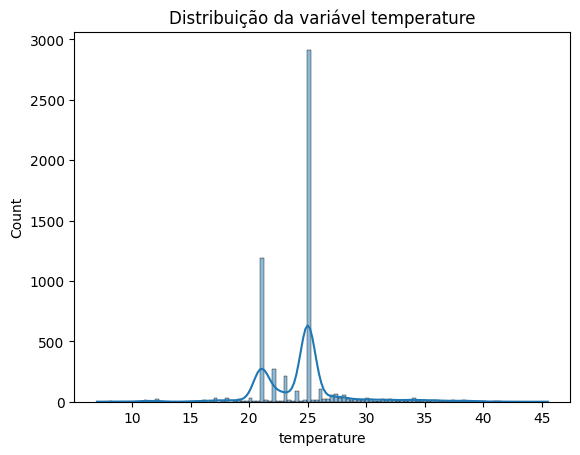

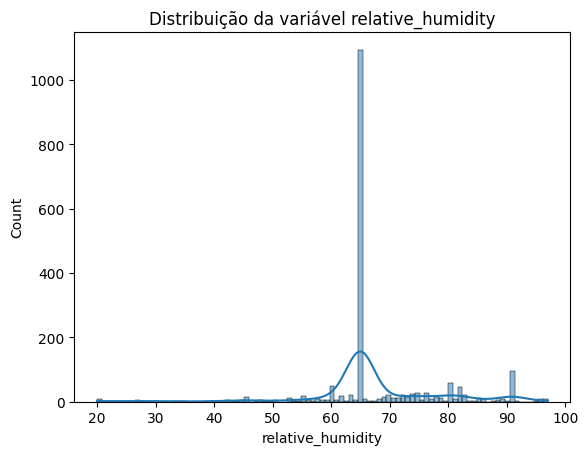

In [ ]:
# Histogramas
colunas_numericas = ['temperature', 'relative_humidity']
for col in colunas_numericas:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

Insights: a visualização da temperature revela picos próximos a 22 °C e 25 °C

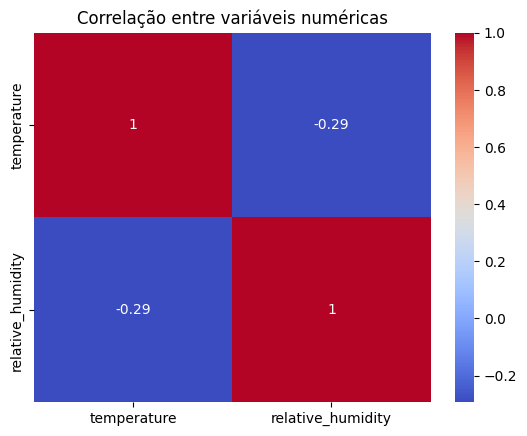

In [ ]:
# Heatmap de correlação
sns.heatmap(df[colunas_numericas].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.show()

Insights: a correlação poderia indicar relações causais ou redundantes que afetariam a performance do modelo. Entretanto, a correlação observada (-0,29) é negativa e fraca, indincando talvez que as duas variáveis devem ser incluídas.

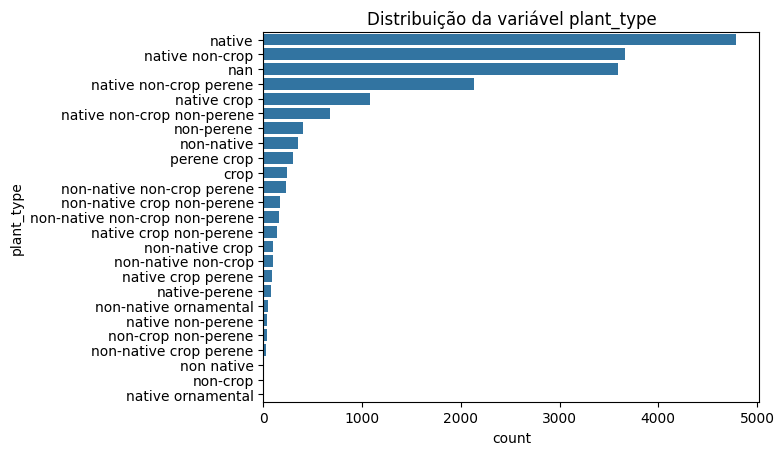

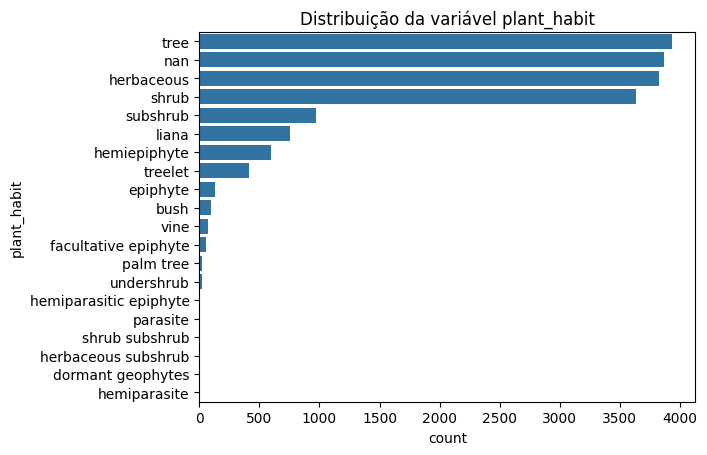

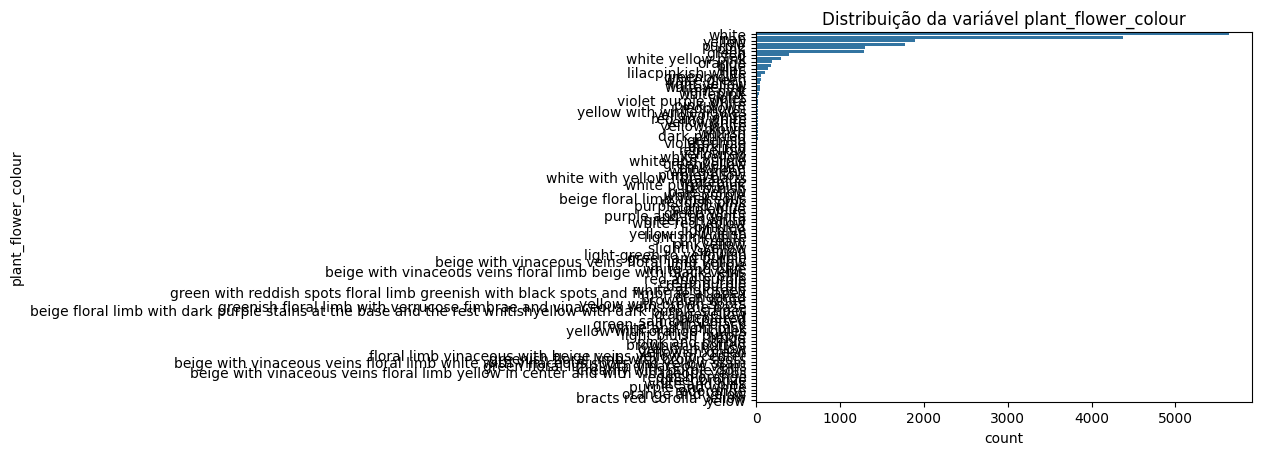

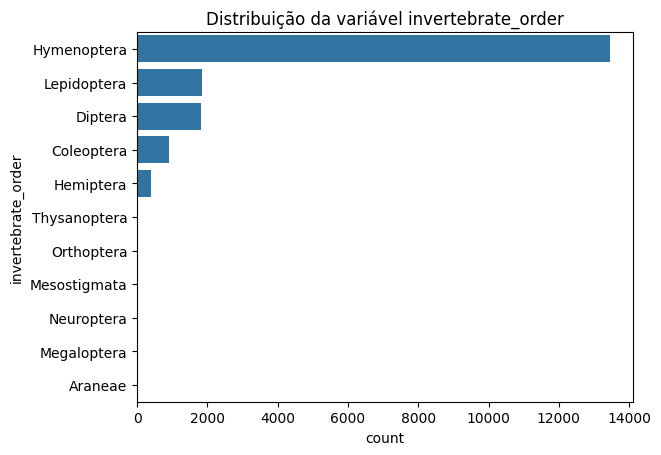

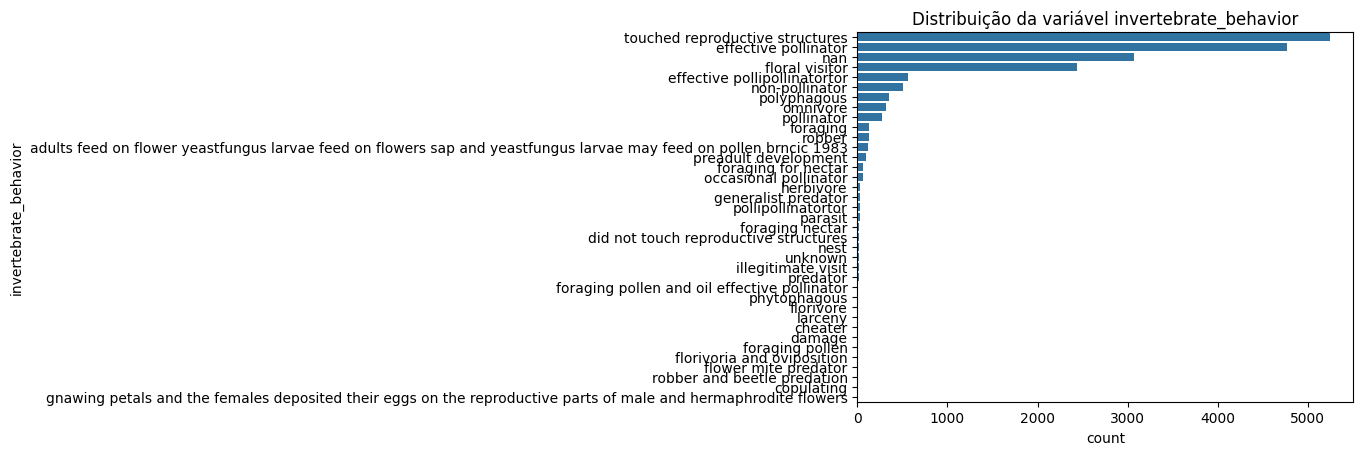

In [79]:
# Gráficos de Contagem para variáveis categóricas
colunas_categoricas = ['plant_type', 'plant_habit', 'plant_flower_colour', 'invertebrate_order', 'invertebrate_behavior']
for col in colunas_categoricas:
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

#3) Preenchimento de dados faltantes

Após a formatação e seleção das colunas relevantes, você deve garantir que todas as colunas estejam com dados válidos em cada coluna.

Para isso, você deve preencher os dados faltantes das colunas usando o algoritmo de agrupamento K-means.

Os passos desse processo são:

Passo 1: Crie um segundo dataset (dataset 2) sem as colunas com dados faltantes.

![Passo1](https://drive.google.com/uc?export=download&id=1dBpwbuWW-I_6_paIQNlfGER2ZZinZ59R)


Passo 2: Aplique o K-means no dataset 2 para gerar clusters de tuplas com características semelhantes.

![Passo2](https://drive.google.com/uc?export=download&id=1mNPNPdecWCqMraoS57a6TQKjkhGDgUHU)

Passo 3: Para cada cluster, selecione as tuplas que não possuam dados faltantes.

![Passo3](https://drive.google.com/uc?export=download&id=1xLwkPSjjxuZpW2zzk0k_-w3-AmvN84gj)

Passo 4: Para as tuplas selecionadas, calcula o atributo estatístico mais adequado para a coluna (média, mediana, moda, etc).

![Passo4](https://drive.google.com/uc?export=download&id=1zt35CNY_CWSGX_igHsA_AWKNZl34TM8K)

Passo 5: Para cada tupla com dados faltantes, utilize o atributo estatístico referente ao seu grupo para preencher o dado da coluna.

![Passo5](https://drive.google.com/uc?export=download&id=1rEvU-6eaQURjzIrblpIiA7b-FFYj_bRD)


In [ ]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Gerar o dataset sem as colunas com dados faltantes
# 2) Aplicar o K-means no novo dataset (explorando o melhor valor de K)
# 3) Cálcular um atributo estatístico (média, moda, mediana, etc), no dataset original, das colunas com dados faltantes
# 4) Preencher os valores das linhas com dados faltantes com o atributo estatístico referente ao seu grupo do K-means

# 4) Escala dos atributos

Por fim, você precisa reescalar os dados, para que os algoritmos consigam aprender as relações entre os dados sem muito ruído e melhora a classificação.

Lembre-se de verificar e tratar colunas com outliers.

In [ ]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Verificar quais dados possuem outliers e tratar de acordo
# 2) Reescalar os dados

# Check-List

Com isso, você completa a fase 1 da disciplina. Para auxiliar você a verificar se o trabalho está adequado para a entrega, criamos uma lista de item que devem ser satisfeitos ao final do trabalho.

- Todas as colunas selecionadas possuem justificativa;
- Todas as colunas estão com a sua representação unificada;
- Todas as colunas estão no formato numérico;
- Todas as colunas estão com dados válidos (sem dados falantes);
- Todas as colunas estão reescaladas.
